# <center>Final Project</center> #
### 105061210 楊雅婷
***

## Description

* 一直以來各種詐騙手法層出不窮，令人防不勝防，但無論是轉帳、提現、充值或是刷卡等等的交易方式都會留下紀錄，因此在這個project中，希望能透過交易紀錄，來建立一個能夠「預測該筆交易是否為詐欺」的模型。<br>
* 除此之外，Fraud Detection 的 dataset 通常極度不平均，因此，在這個 project 中也希望能夠探討並發掘一些對於 imbalanced dataset 的處理方法

## Dataset:
* Synthetic Financial Datasets For Fraud Detection (from Kaggle)

## Attributes:
* step : 時間單位
* type : 交易類型 -> CASH_OUT, PAYMENT, CASH_IN, TRANSFER, DEBIT
* amount : 交易金額
* nameOrig : 發起交易的帳戶名稱
* oldbalanceOrg : 交易前發起交易的帳戶餘額
* newbalanceOrig : 交易後發起交易的帳戶餘額
* nameDest : 交易對象的帳戶名稱
* oldbalanceDest : 交易前交易對象的帳戶餘額
* newbalanceDest : 交易後交易對象的帳戶餘額
* isFlaggedFraud : The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction

## Class 
* isFraud : 是否為詐欺 -> 1是詐欺，0不是詐欺

## Implementation

### Step 1
先對資料進行讀檔與觀察：
* 每個 Attribute 的型態（object, float, int...etc.）
* 是否有 Null 的資料
* 簡單的進行統計（但通常觀察不出什麼）

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./PS_20174392719_1491204439457_log.csv')
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
print('Not Frauds : ', df['isFraud'].value_counts()[0])
print('Frauds : ', df['isFraud'].value_counts()[1])

Not Frauds :  6354407
Frauds :  8213


### Step2
查看詐欺與交易類型之間的關係：
* 詐欺在整筆資料中的比例（極度不平均）
* 每個交易 type 在全部資料中佔的比例
* 針對**詐欺**與**非詐欺**進行交易類型的統計

In [8]:
print('Not Frauds : ', round(df['isFraud'].value_counts()[0]/len(df) * 100, 2), '% of the dataset')
print('Frauds : ', round(df['isFraud'].value_counts()[1]/len(df) * 100, 2), '% of the dataset')

Not Frauds :  99.87 % of the dataset
Frauds :  0.13 % of the dataset


In [9]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

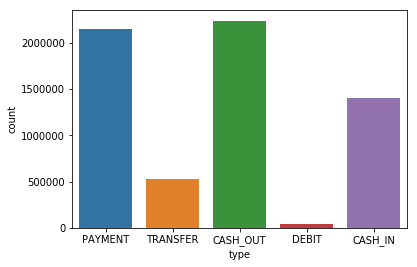

In [10]:
sns.countplot('type', data = df)
plt.show()

In [11]:
df.groupby(['isFraud','type']).size()

isFraud  type    
0        CASH_IN     1399284
         CASH_OUT    2233384
         DEBIT         41432
         PAYMENT     2151495
         TRANSFER     528812
1        CASH_OUT       4116
         TRANSFER       4097
dtype: int64

#### 發現：詐欺只發生在 type 為 **CASH_OUT** 跟 **TRANSFER** 時！

### Step 3
對 isFlaggedFraud 這個 Attribute 進行觀察：
* 0和1的比例
* 被標為1的是否有特殊之處，或是否與判斷詐欺有關
> - IsFlaggedFraud 總共只有16筆，且這16筆都是詐欺
> - 16筆的 type 都是 TRANSFER
> - 原本 dataset 中對 isFlaggedFraud 的解釋是： The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction<br>
> - 的確，isFlaggedFraud = 1 的交易額都大於 200.000，但並不是所有大於200.000的都有被標記為1。<br>
> - 除此之外， isFlaggedFraud = 0 的交易額也不見得小，實在是分辨不太出來標記的標準。<br>
> - 唯一能確定的是，**isFlaggedFraud = 1 的一定會是詐欺**。

In [12]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [13]:
df_isFlaggedFraud_1 = df.loc[df.isFlaggedFraud == 1]
df_isFlaggedFraud_0 = df.loc[df.isFlaggedFraud == 0]

print('Minimum amount when isFlaggedFraud = 1 : ', df_isFlaggedFraud_1.amount.min())
print('Maximum amount when isFlaggedFraud = 0 : ', df_isFlaggedFraud_0.amount.max())

Minimum amount when isFlaggedFraud = 1 :  353874.22
Maximum amount when isFlaggedFraud = 0 :  92445516.64


In [14]:
df.groupby(['isFraud','isFlaggedFraud']).size()

isFraud  isFlaggedFraud
0        0                 6354407
1        0                    8197
         1                      16
dtype: int64

In [15]:
df.groupby(['type','isFlaggedFraud']).size()

type      isFlaggedFraud
CASH_IN   0                 1399284
CASH_OUT  0                 2237500
DEBIT     0                   41432
PAYMENT   0                 2151495
TRANSFER  0                  532893
          1                      16
dtype: int64

In [16]:
df_isFlaggedFraud_1_transfer = df_isFlaggedFraud_1.loc[df_isFlaggedFraud_1.type == 'TRANSFER']
df_isFlaggedFraud_0_transfer = df_isFlaggedFraud_0.loc[df_isFlaggedFraud_0.type == 'TRANSFER']

In [17]:
print('有被標記且為TRANSFER的最小交易額',df_isFlaggedFraud_1_transfer.amount.min())
print('有被標記且為TRANSFER的最大交易額',df_isFlaggedFraud_1_transfer.amount.max())
print('沒被標記且為TRANSFER的最小交易額',df_isFlaggedFraud_0_transfer.amount.min())
print('沒被標記且為TRANSFER的最大交易額',df_isFlaggedFraud_0_transfer.amount.max())

有被標記且為TRANSFER的最小交易額 353874.22
有被標記且為TRANSFER的最大交易額 10000000.0
沒被標記且為TRANSFER的最小交易額 2.6
沒被標記且為TRANSFER的最大交易額 92445516.64


### Step 4
查看交易賬戶與詐欺之間的關係：
* 發現帳戶開頭有C跟M兩種常出現的類型
* 觀察詐欺案例的發起和接收帳戶與非詐欺案例中的發起和接收帳戶

In [18]:
df_isFraud_1 = df.loc[df.isFraud == 1]
df_isFraud_0 = df.loc[df.isFraud == 0]
print("isFraud_1 nameOrig has C:", len(df_isFraud_1.loc[df_isFraud_1.nameOrig.str.contains('C')]))
print("isFraud_1 nameOrig has M:", len(df_isFraud_1.loc[df_isFraud_1.nameOrig.str.contains('M')]))
print("isFraud_1 nameDest has C:", len(df_isFraud_1.loc[df_isFraud_1.nameDest.str.contains('C')]))
print("isFraud_1 nameDest has M:", len(df_isFraud_1.loc[df_isFraud_1.nameDest.str.contains('M')]))

print("isFraud_0 nameOrig has C:", len(df_isFraud_0.loc[df_isFraud_0.nameOrig.str.contains('C')]))
print("isFraud_0 nameOrig has M:", len(df_isFraud_0.loc[df_isFraud_0.nameOrig.str.contains('M')]))
print("isFraud_0 nameDest has C:", len(df_isFraud_0.loc[df_isFraud_0.nameDest.str.contains('C')]))
print("isFraud_0 nameDest has M:", len(df_isFraud_0.loc[df_isFraud_0.nameDest.str.contains('M')]))

isFraud_1 nameOrig has C: 8213
isFraud_1 nameOrig has M: 0
isFraud_1 nameDest has C: 8213
isFraud_1 nameDest has M: 0
isFraud_0 nameOrig has C: 6354407
isFraud_0 nameOrig has M: 0
isFraud_0 nameDest has C: 4202912
isFraud_0 nameDest has M: 2151495


#### 發現：詐欺只發生在帳戶名稱 C -> C 交易時，C -> M 通常不為詐欺

### Step 5
自己新增2個 feature ，用來記錄：
* 發起交易賬戶的餘額錯誤
* 接收交易帳戶的餘額錯誤
<br>（這是我自己的推測，或許錯誤的餘額對於偵測詐欺會有所幫助）

In [19]:
df['error_balanceOrig'] = df.newbalanceOrig + df.amount - df.oldbalanceOrg
df['error_balanceDest'] = df.oldbalanceDest +df.amount - df.newbalanceDest
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,error_balanceOrig,error_balanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,0.00,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,0.00,1864.28
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,0.00,181.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,0.00,21363.00
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,0.00,11668.14
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,0.00,7817.71
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,0.00,7107.77
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,0.00,7861.64
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,1353.36,4024.36
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,0.00,6886.98


In [20]:
df_isFraud_1 = df.loc[df.isFraud == 1]
df_isFraud_0 = df.loc[df.isFraud == 0]
print("isFraud_1 error_balanceOrig is 0 : ", len(df_isFraud_1.loc[df_isFraud_1.error_balanceOrig==0]))
print("isFraud_1 error_balanceOrig not 0 : ", len(df_isFraud_1.loc[df_isFraud_1.error_balanceOrig!=0]))
print("isFraud_1 error_balanceDest is 0 : ", len(df_isFraud_1.loc[df_isFraud_1.error_balanceDest==0]))
print("isFraud_1 error_balanceDest not 0 : ", len(df_isFraud_1.loc[df_isFraud_1.error_balanceDest!=0]))

print("isFraud_0 error_balanceOrig is 0 : ", len(df_isFraud_0.loc[df_isFraud_0.error_balanceOrig==0]))
print("isFraud_0 error_balanceOrig not 0 : ", len(df_isFraud_0.loc[df_isFraud_0.error_balanceOrig!=0]))
print("isFraud_0 error_balanceDest is 0 : ", len(df_isFraud_0.loc[df_isFraud_0.error_balanceDest==0]))
print("isFraud_0 error_balanceDest not 0 : ", len(df_isFraud_0.loc[df_isFraud_0.error_balanceDest!=0]))

isFraud_1 error_balanceOrig is 0 :  8156
isFraud_1 error_balanceOrig not 0 :  57
isFraud_1 error_balanceDest is 0 :  2889
isFraud_1 error_balanceDest not 0 :  5324
isFraud_0 error_balanceOrig is 0 :  1141995
isFraud_0 error_balanceOrig not 0 :  5212412
isFraud_0 error_balanceDest is 0 :  1623057
isFraud_0 error_balanceDest not 0 :  4731350


### step 6 
**處理極度不平均的數據**<br>
在數據極度不平均的情況下，如果不進行適當的修正，則 model 若是全部將 data 分類為較多的那一類（0）也會有非常高的 accuracy<br>
但這並非這個預測模型的本意<br>
在 Fraud Detection 中，所希望的是可以完全偵測出較少（詐欺）的那一類（1）
* under sampling
> 將較多的那個 class 隨機抽取出和較少的class同樣多筆的資料 <br>
> 即：從 isFraud = 0 中隨機抽取出和 isFraud = 1 同樣多筆的資料 <br>
> - 優點：<br>
> 解決了兩個 class 極度不平均的問題<br>
> 資料從六百多萬筆變成將近兩萬筆，可以縮短訓練時間<br>
> - 缺點：<br>
> 忽略了沒被隨機選中的那些資料<br>
> 資料變少，可能導致數據分佈發生改變
* over sampling
> 將較少的那個 class 運用一些方式產生出和較多的 class 同樣多筆的資料<br>
> 即：想辦法讓 isFraud = 1 的筆數變得和 isFraud = 0 一樣多<br>
> 一般的 oversampling 方式可能會產生很多重複的樣本<br>
> 網路上找到的 SMOTE (Synthetic Minority Over-Sampling Technique) 則是能人工合成新的樣本<br>
> - 優點：<br>
> 並沒有忽略原始 dataset 中的任何資料<br>
> 有足夠多的訓練資料<br>
> - 缺點：<br>
> 增加許多訓練時間<br>
> 隨機複製的話可能比較會有 overfitting 的情況發生<br>
> 人工合成的樣本畢竟不是真實世界中收集到的 data<br>

**評估 model** <br>
由於 Fraud Detection 這個 task 的特殊性，需要考慮的不僅是 Accuracy<br>
而是**是否能夠完全揪出詐欺交易**<br>
所以除了 accuracy 之外，還會加入 **precision** 以及 **recall** 進行評估
* precision : 是‘被判斷為詐欺且確實為詐欺’占所有‘被判斷為詐欺’的比例
* recall : 是‘被判斷為詐欺且確實為詐欺’占所有‘確實為詐欺’的比例

### Under sampling

In [21]:
len(df[df['isFraud'] == 1])

8213

In [22]:
non_fraud_index = df[df['isFraud'] == 0].index
random_index = np.random.choice(non_fraud_index, len(df[df['isFraud'] == 1]),  replace=False)
fraud_index = df[df['isFraud'] == 1].index
under_sample_index = np.concatenate([fraud_index, random_index])
df_under_sample = df.loc[under_sample_index]

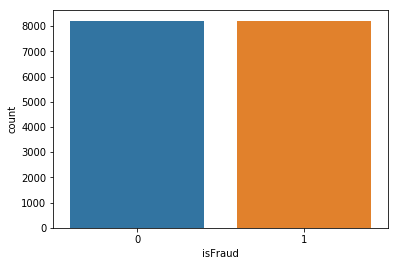

In [23]:
sns.countplot('isFraud', data = df_under_sample)
plt.show()

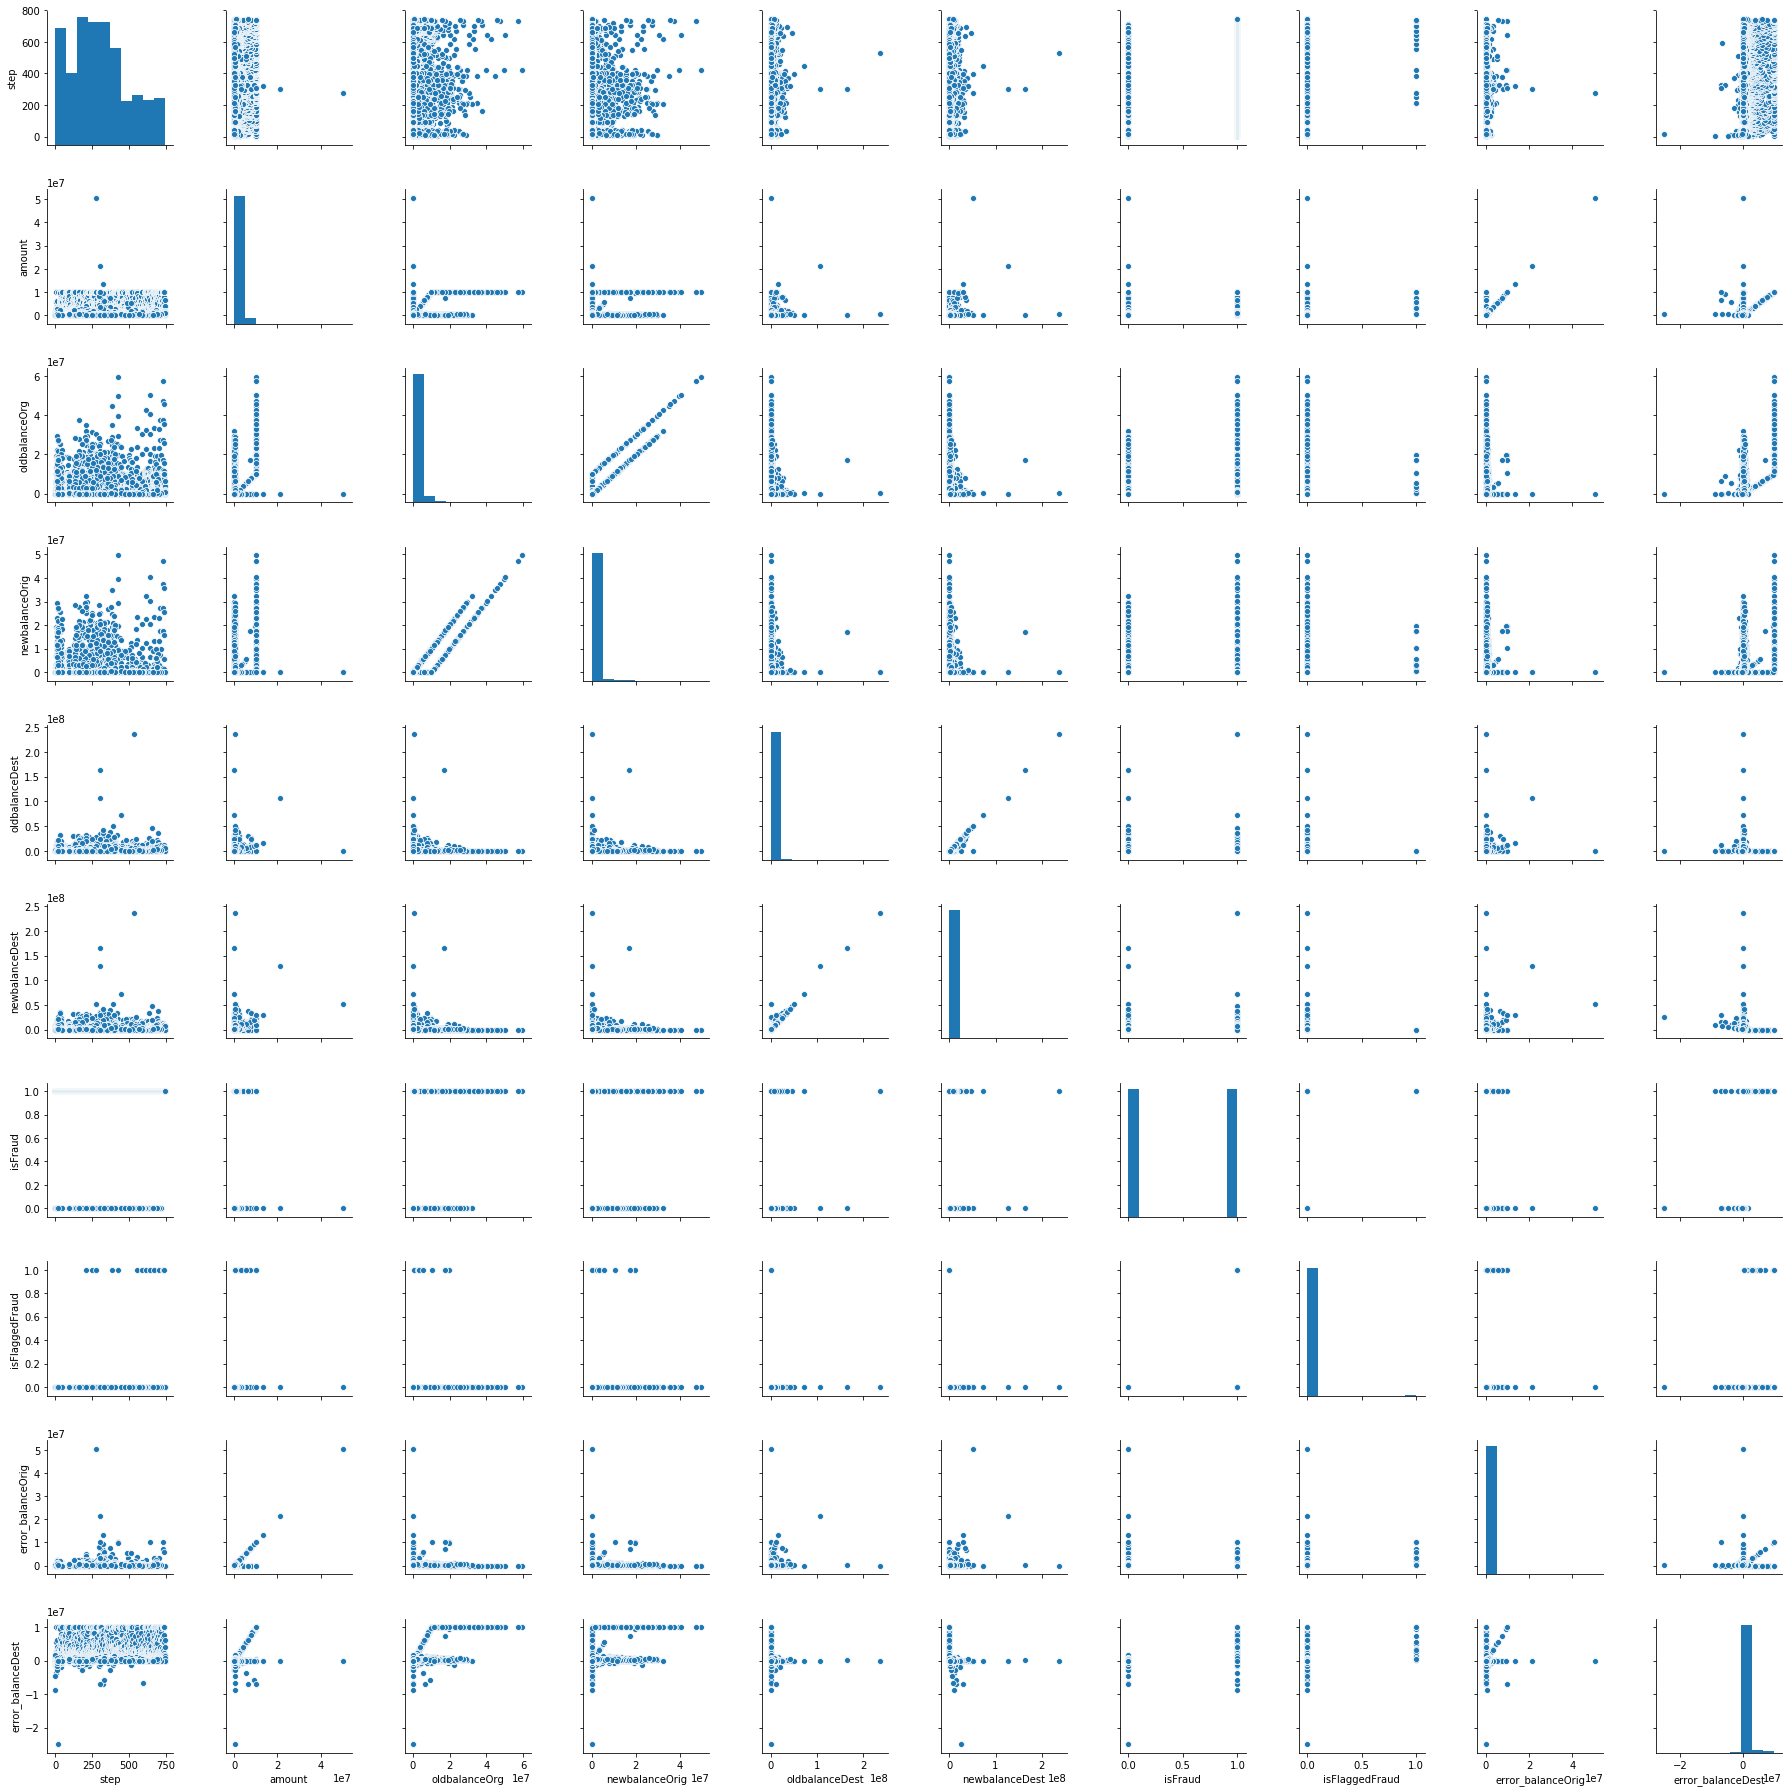

In [24]:
sns.pairplot(df_under_sample, height = 2.5)
plt.tight_layout()

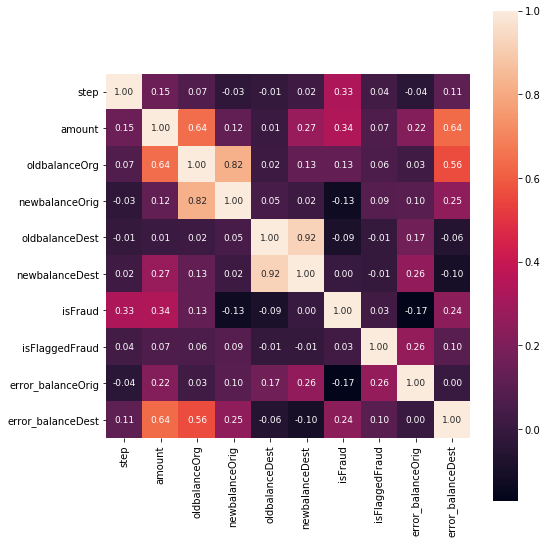

In [25]:
use_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'error_balanceOrig', 'error_balanceDest']
plt.subplots(figsize=(8,8))
cm = np.corrcoef(df_under_sample[use_cols].values.T)
hm = sns.heatmap(cm, 
                 cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size' : 9},
                yticklabels = use_cols,
                xticklabels = use_cols)
plt.tight_layout()

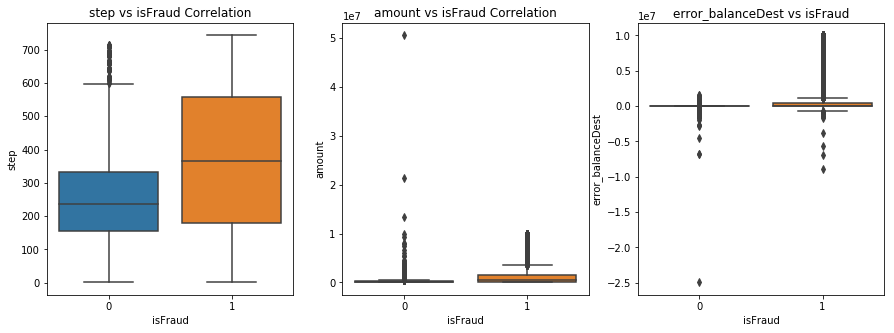

In [26]:
f, axes = plt.subplots(ncols=3, figsize=(15, 5))

sns.boxplot(x="isFraud", y="step", data=df_under_sample, ax=axes[0])
axes[0].set_title('step vs isFraud Correlation')

sns.boxplot(x="isFraud", y="amount", data=df_under_sample, ax=axes[1])
axes[1].set_title('amount vs isFraud Correlation')

sns.boxplot(x="isFraud", y="error_balanceDest", data=df_under_sample, ax=axes[2])
axes[2].set_title('error_balanceDest vs isFraud')

plt.show()

到目前為止，似乎沒有看出詐欺和哪幾個 feature 特別相關，因此並不使用降維<br>
但因為之前發現：詐欺只發生在 type 為 CASH_OUT 跟 TRANSFER 時<br>
因此在 type encoding 的時候，將 CASH_OUT 跟 TRANSFER 都 encode 成 1，其他的為 0

In [27]:
X_under = df_under_sample.drop('isFraud', axis=1)
y_under = df_under_sample['isFraud']

In [28]:
type_encoding = {'CASH_IN' : 0, 'CASH_OUT' : 1, 'DEBIT' : 0, 'PAYMENT' : 0, 'TRANSFER' : 1} 
X_under["type"].replace(type_encoding, inplace = True)
X_under = X_under.drop(['nameOrig', 'nameDest'], axis=1)

這邊是先 under sample 完才做 train-test split （後來發現這種做法不太合理）

In [30]:
from sklearn.model_selection import train_test_split

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under, y_under, test_size=0.25, random_state=123)

In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_under_train)
X_under_train_std = sc.transform(X_under_train)
X_under_test_std = sc.transform(X_under_test)

/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


### LogisticRegression (under sample)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_C = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
lr = LogisticRegression(random_state=0)
param_grid = [{'C': param_C}]
gs = GridSearchCV(estimator=lr, 
                  param_grid=param_grid, 
                  scoring='accuracy')
gs.fit(X_under_train_std, y_under_train)
print(gs.best_score_)
print(gs.best_params_)

/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futu

0.964851043104148
{'C': 1000.0}


In [33]:
from sklearn.metrics import accuracy_score

lr = gs.best_estimator_
y_under_pred_lr = lr.predict(X_under_test_std)
print('Misclassified samples: %d' % (y_under_test != y_under_pred_lr).sum())
print('Accuracy: %.2f' % accuracy_score(y_under_test, y_under_pred_lr))

Misclassified samples: 142
Accuracy: 0.97


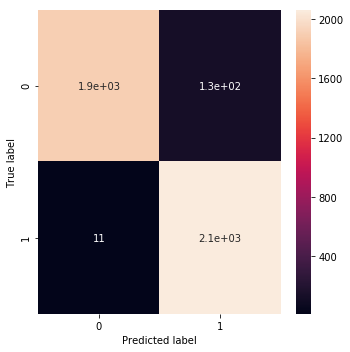

In [34]:
from sklearn.metrics import confusion_matrix

lr_cf = confusion_matrix(y_true=y_under_test, y_pred=y_under_pred_lr)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lr_cf, ax=ax, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

In [35]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
def plot_curve(model = None, X = None, y = None, Name = "None"):
    
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title(Name)
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.legend(loc='best')
    plt.show()

/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
No handles with labels found to put in legend.


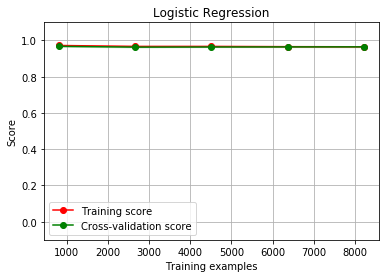

In [36]:
plot_curve(lr, X_under_train_std, y_under_train, Name = "Logistic Regression")

In [37]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_under_test, y_under_pred_lr))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2034
           1       0.94      0.99      0.97      2073

   micro avg       0.97      0.97      0.97      4107
   macro avg       0.97      0.97      0.97      4107
weighted avg       0.97      0.97      0.97      4107



#### Logistic Regression (under sample) 小結
* Accuracy : 0.96
* 在約 2100 筆詐欺中，**未偵測到 11 筆**
* 將 133 筆非詐欺誤判為詐欺

#### 其實上面的做法不太對，應該要先分 train -- test，才做 under sampling
#### 下面是更正 (之後每一個ML的model之後都會有更正)

#### 重新分 data，先進行 train - test split，才做 under sampling

In [38]:
X_orig = df.drop('isFraud', axis = 1)
y_orig = df['isFraud']

In [39]:
type_encoding = {'CASH_IN' : 0, 'CASH_OUT' : 1, 'DEBIT' : 0, 'PAYMENT' : 0, 'TRANSFER' : 1} 
X_orig["type"].replace(type_encoding, inplace = True)
X_orig = X_orig.drop(['nameOrig', 'nameDest'], axis=1)

In [40]:
from sklearn.model_selection import train_test_split

X_orig_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(X_orig, y_orig, test_size=0.25, random_state=123)

In [41]:
non_fraud_index = y_orig_train[y_orig_train == 0].index
random_index = np.random.choice(non_fraud_index, len(y_orig_train[y_orig_train == 1]),  replace=False)
fraud_index = y_orig_train[y_orig_train == 1].index
under_sample_index = np.concatenate([fraud_index, random_index])
under_sample_X_train = X_orig_train.loc[under_sample_index]
under_sample_y_train = y_orig_train.loc[under_sample_index]

In [42]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(under_sample_X_train)
under_sample_X_train_std = sc.transform(under_sample_X_train)
X_orig_test_std = sc.transform(X_orig_test)


/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


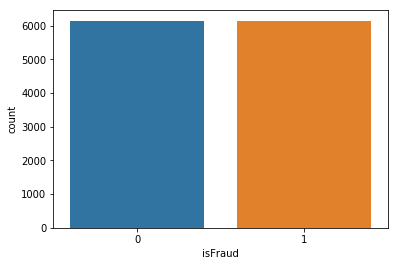

In [43]:
sns.countplot(under_sample_y_train, data = under_sample_y_train)
plt.show()

這樣就從各八千多筆變成各六千多筆了

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_C = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
lr = LogisticRegression(random_state=0)
param_grid = [{'C': param_C}]
gs = GridSearchCV(estimator=lr, 
                  param_grid=param_grid, 
                  scoring='accuracy')
gs.fit(under_sample_X_train_std, under_sample_y_train)
print(gs.best_score_)
print(gs.best_params_)

/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futu

0.9660810151293314
{'C': 1000.0}


In [45]:
from sklearn.metrics import accuracy_score

lr = gs.best_estimator_
y_under_pred_lr = lr.predict(X_orig_test_std)
print('Misclassified samples: %d' % ( y_orig_test != y_under_pred_lr).sum())
print('Accuracy: %.2f' % accuracy_score( y_orig_test, y_under_pred_lr))

Misclassified samples: 94177
Accuracy: 0.94


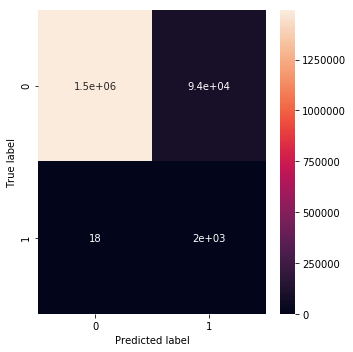

In [46]:
from sklearn.metrics import confusion_matrix

lr_cf = confusion_matrix(y_true= y_orig_test, y_pred=y_under_pred_lr)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lr_cf, ax=ax, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

In [47]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_orig_test, y_under_pred_lr))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1588589
           1       0.02      0.99      0.04      2066

   micro avg       0.94      0.94      0.94   1590655
   macro avg       0.51      0.97      0.51   1590655
weighted avg       1.00      0.94      0.97   1590655



#### 可以看出對於詐欺的 recall 差不多，有18筆詐欺沒被偵測到，但是 accuracy 降低，將非詐欺誤判為詐欺的比例增加

### KNN (under sample)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

param_n_neighbors = [2, 3, 4, 5, 8, 10, 12, 15]
param_metric = ['braycurtis', 'minkowski', 'chebyshev']
knn = KNeighborsClassifier()
param_grid = [{'n_neighbors': param_n_neighbors,
               'metric': param_metric}]
gs = GridSearchCV(estimator=knn, 
                  param_grid=param_grid, 
                  scoring='accuracy')
gs.fit(X_under_train_std, y_under_train)
print(gs.best_score_)
print(gs.best_params_)

/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9617663771410017
{'n_neighbors': 2, 'metric': 'braycurtis'}


In [50]:
from sklearn.metrics import accuracy_score

knn = gs.best_estimator_
y_under_pred_knn = knn.predict(X_under_test_std)
print('Misclassified samples: %d' % (y_under_test != y_under_pred_knn).sum())
print('Accuracy: %.2f' % accuracy_score(y_under_test, y_under_pred_knn))

Misclassified samples: 150
Accuracy: 0.96


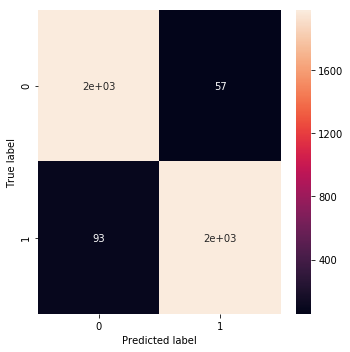

In [52]:
from sklearn.metrics import confusion_matrix

knn_cf = confusion_matrix(y_true=y_under_test, y_pred=y_under_pred_knn)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knn_cf, ax=ax, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
No handles with labels found to put in legend.


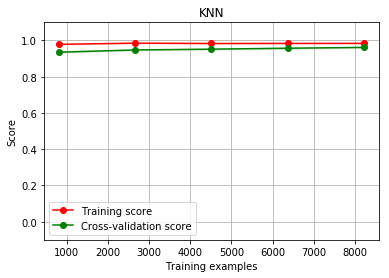

In [53]:
plot_curve(knn, X_under_train_std, y_under_train, Name = "KNN")

In [54]:
from sklearn.metrics import classification_report

print('KNN')
print(classification_report(y_under_test, y_under_pred_knn))

KNN
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2034
           1       0.97      0.96      0.96      2073

   micro avg       0.96      0.96      0.96      4107
   macro avg       0.96      0.96      0.96      4107
weighted avg       0.96      0.96      0.96      4107



#### KNN (under sample) 小結
* Accuracy : 0.96
* 在約 2100 筆詐欺中，**未偵測到 93 筆**
* 將 57 筆非詐欺誤判為詐欺

#### 上面的做法同樣不太對，應該要先分 train - test split，才做 under sampling
#### 下面是更正（拿上面重分好的來用）

In [55]:
from sklearn.neighbors import KNeighborsClassifier

param_n_neighbors = [2, 3, 4, 5, 8, 10, 12, 15]
param_metric = ['braycurtis', 'minkowski', 'chebyshev']
knn = KNeighborsClassifier()
param_grid = [{'n_neighbors': param_n_neighbors,
               'metric': param_metric}]
gs = GridSearchCV(estimator=knn, 
                  param_grid=param_grid, 
                  scoring='accuracy')
gs.fit(under_sample_X_train_std, under_sample_y_train)
print(gs.best_score_)
print(gs.best_params_)

/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9627460549861722
{'n_neighbors': 5, 'metric': 'braycurtis'}


In [56]:
from sklearn.metrics import accuracy_score

knn = gs.best_estimator_
y_under_pred_knn = knn.predict(X_orig_test_std)
print('Misclassified samples: %d' % (y_orig_test != y_under_pred_knn).sum())
print('Accuracy: %.2f' % accuracy_score(y_orig_test, y_under_pred_knn))

Misclassified samples: 74415
Accuracy: 0.95


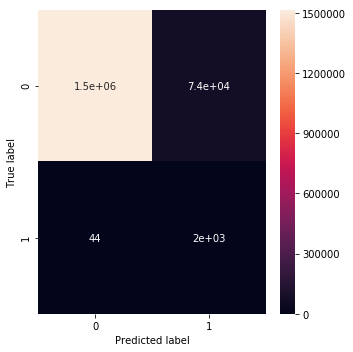

In [57]:
from sklearn.metrics import confusion_matrix

knn_cf = confusion_matrix(y_true=y_orig_test, y_pred=y_under_pred_knn)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knn_cf, ax=ax, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

In [58]:
from sklearn.metrics import classification_report

print('KNN')
print(classification_report(y_orig_test, y_under_pred_knn))

KNN
              precision    recall  f1-score   support

           0       1.00      0.95      0.98   1588589
           1       0.03      0.98      0.05      2066

   micro avg       0.95      0.95      0.95   1590655
   macro avg       0.51      0.97      0.51   1590655
weighted avg       1.00      0.95      0.97   1590655



#### 可以看出對於詐欺的 recall 提升，但 accuracy 差不多，不過將非詐欺誤判成詐欺的比例提高

### Random Forest (under sample)

In [59]:
from sklearn.ensemble import RandomForestClassifier

param_max_depth = [1, 3, 5, 10, 15]
param_criterion = ['gini', 'entropy']
param_n_estimators = [100, 500, 1000, 1500]
rf = RandomForestClassifier(random_state=0,
                                       n_jobs=4)
param_grid = [{'max_depth': param_max_depth,  
               'criterion' : param_criterion,
               'n_estimators' : param_n_estimators}]
gs = GridSearchCV(estimator=rf, 
                  param_grid=param_grid, 
                  scoring='accuracy')

gs = gs.fit(X_under_train_std, y_under_train)
print(gs.best_score_)
print(gs.best_params_)

/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9977270882376816
{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 100}


In [60]:
from sklearn.metrics import accuracy_score

rf = gs.best_estimator_
y_under_pred_rf = rf.predict(X_under_test_std)
print('Misclassified samples: %d' % (y_under_test != y_under_pred_rf).sum())
print('Accuracy: %.2f' % accuracy_score(y_under_test, y_under_pred_rf))

Misclassified samples: 5
Accuracy: 1.00


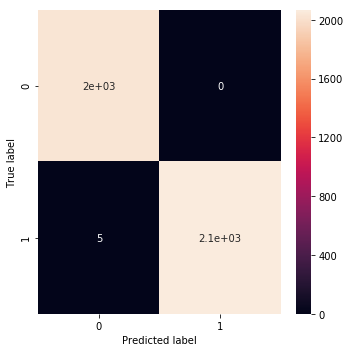

In [61]:
from sklearn.metrics import confusion_matrix

rf_cf = confusion_matrix(y_true=y_under_test, y_pred=y_under_pred_rf)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rf_cf, ax=ax, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
No handles with labels found to put in legend.


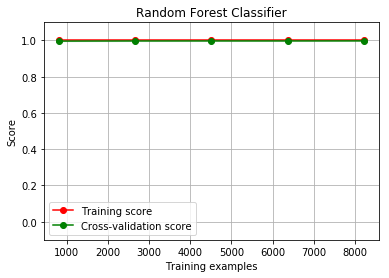

In [62]:
plot_curve(rf, X_under_train_std, y_under_train, Name = "Random Forest Classifier")

In [63]:
from sklearn.metrics import classification_report

print('Random Forest Classifier')
print(classification_report(y_under_test, y_under_pred_rf))

Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2034
           1       1.00      1.00      1.00      2073

   micro avg       1.00      1.00      1.00      4107
   macro avg       1.00      1.00      1.00      4107
weighted avg       1.00      1.00      1.00      4107



#### Random Forest (under sample) 小結
* Accuracy : 1.00
* 在約 2100 筆詐欺中，**未偵測到 5 筆**
* 將 0 筆非詐欺誤判為詐欺

#### 其實上面的做法同樣不太對，應該要先分 train -- test，才做 under sampling
#### 下面是更正

In [64]:
from sklearn.ensemble import RandomForestClassifier

param_max_depth = [1, 3, 5, 10, 15]
param_criterion = ['gini', 'entropy']
param_n_estimators = [100, 500, 1000, 1500]
rf = RandomForestClassifier(random_state=0,
                                       n_jobs=4)
param_grid = [{'max_depth': param_max_depth,  
               'criterion' : param_criterion,
               'n_estimators' : param_n_estimators}]
gs = GridSearchCV(estimator=rf, 
                  param_grid=param_grid, 
                  scoring='accuracy')

gs = gs.fit(under_sample_X_train_std, under_sample_y_train)
print(gs.best_score_)
print(gs.best_params_)

/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.998129168700179
{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 100}


In [65]:
from sklearn.metrics import accuracy_score

rf = gs.best_estimator_
y_under_pred_rf = rf.predict(X_orig_test_std)
print('Misclassified samples: %d' % (y_orig_test != y_under_pred_rf).sum())
print('Accuracy: %.2f' % accuracy_score(y_orig_test, y_under_pred_rf))

Misclassified samples: 484
Accuracy: 1.00


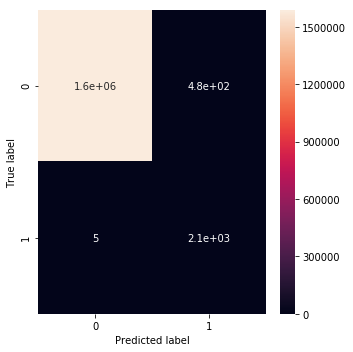

In [66]:
from sklearn.metrics import confusion_matrix

rf_cf = confusion_matrix(y_true=y_orig_test, y_pred=y_under_pred_rf)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rf_cf, ax=ax, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

In [67]:
from sklearn.metrics import classification_report

print('Random Forest Classifier')
print(classification_report(y_orig_test, y_under_pred_rf))

Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588589
           1       0.81      1.00      0.89      2066

   micro avg       1.00      1.00      1.00   1590655
   macro avg       0.91      1.00      0.95   1590655
weighted avg       1.00      1.00      1.00   1590655



#### 對於詐欺的 recall 一樣好，且 accuracy 沒有差很多

### SVM (under sample)

In [68]:
from sklearn.svm import SVC

param_C = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_gamma = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]
svm = SVC(random_state=0)

param_grid = [{'C': param_C,  
               'gamma' : param_gamma,
               'kernel': ['rbf']}]
gs = GridSearchCV(estimator=svm, 
                  param_grid=param_grid, 
                  scoring='accuracy')

gs = gs.fit(X_under_train_std, y_under_train)
print(gs.best_score_)
print(gs.best_params_)

/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9856319506453446
{'kernel': 'rbf', 'gamma': 0.1, 'C': 1000.0}


In [69]:
svm = gs.best_estimator_
y_under_pred_svm = svm.predict(X_under_test_std)
print('Misclassified samples: %d' % (y_under_test != y_under_pred_svm).sum())
print('Accuracy: %.2f' % accuracy_score(y_under_test, y_under_pred_svm))

Misclassified samples: 64
Accuracy: 0.98


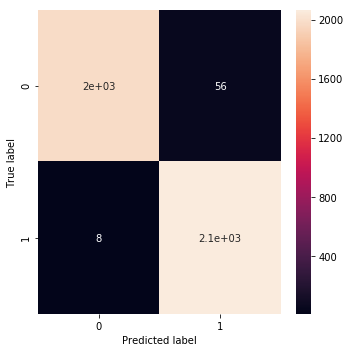

In [70]:
from sklearn.metrics import confusion_matrix

svm_cf = confusion_matrix(y_true=y_under_test, y_pred=y_under_pred_svm)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svm_cf, ax=ax, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
No handles with labels found to put in legend.


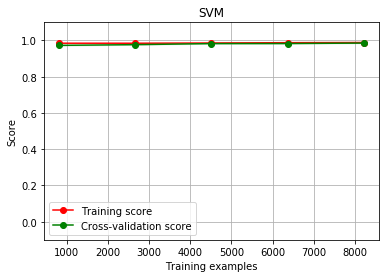

In [71]:
plot_curve(svm, X_under_train_std, y_under_train, Name = "SVM")

In [72]:
from sklearn.metrics import classification_report

print('SVM:')
print(classification_report(y_under_test, y_under_pred_svm))

SVM:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2034
           1       0.97      1.00      0.98      2073

   micro avg       0.98      0.98      0.98      4107
   macro avg       0.98      0.98      0.98      4107
weighted avg       0.98      0.98      0.98      4107



#### SVM (under sample) 小結
* Accuracy : 0.98
* 在約 2100 筆詐欺中，**未偵測到 8 筆**
* 將 56 筆非詐欺誤判為詐欺

#### 上面的做法不太對，應該要先分 train -- test，才做 under sampling
#### 下面是更正

In [73]:
from sklearn.svm import SVC

param_C = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_gamma = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]
svm = SVC(random_state=0)

param_grid = [{'C': param_C,  
               'gamma' : param_gamma,
               'kernel': ['rbf']}]
gs = GridSearchCV(estimator=svm, 
                  param_grid=param_grid, 
                  scoring='accuracy')

gs = gs.fit(under_sample_X_train_std, under_sample_y_train)
print(gs.best_score_)
print(gs.best_params_)

/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9819424109321621
{'kernel': 'rbf', 'gamma': 1.0, 'C': 1000.0}


In [74]:
svm = gs.best_estimator_
y_under_pred_svm = svm.predict(X_orig_test_std)
print('Misclassified samples: %d' % (y_orig_test != y_under_pred_svm).sum())
print('Accuracy: %.2f' % accuracy_score(y_orig_test, y_under_pred_svm))

Misclassified samples: 36987
Accuracy: 0.98


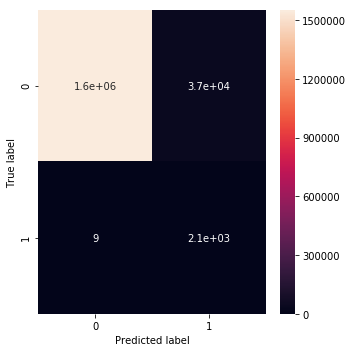

In [75]:
from sklearn.metrics import confusion_matrix

svm_cf = confusion_matrix(y_true=y_orig_test, y_pred=y_under_pred_svm)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svm_cf, ax=ax, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

In [76]:
from sklearn.metrics import classification_report

print('SVM:')
print(classification_report(y_orig_test, y_under_pred_svm))

SVM:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1588589
           1       0.05      1.00      0.10      2066

   micro avg       0.98      0.98      0.98   1590655
   macro avg       0.53      0.99      0.54   1590655
weighted avg       1.00      0.98      0.99   1590655



#### 詐欺的 recall 降低了一點點，accuracy差不多，但將非詐欺誤判成詐欺的比例提高

* 下面只是想試試看，如果在做 Grid search 的時候把標準從 accuracy 改成 f1 score (同時考慮 precision 跟 recall) 的話效果會不會更好（挑了上面最好的 random forest）來嘗試

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_max_depth = [5, 10, 15, 18, 20]
param_criterion = ['gini', 'entropy']
param_n_estimators = [100, 500, 1000, 1500]
rf = RandomForestClassifier(random_state=0,
                                       n_jobs=4)
param_grid = [{'max_depth': param_max_depth,  
               'criterion' : param_criterion,
               'n_estimators' : param_n_estimators}]
gs = GridSearchCV(estimator=rf, 
                  param_grid=param_grid, 
                  scoring='f1')

gs = gs.fit(under_sample_X_train_std, under_sample_y_train)
print(gs.best_score_)
print(gs.best_params_)

/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9981257677990534
{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 100}


In [78]:
from sklearn.metrics import accuracy_score

rf = gs.best_estimator_
y_under_pred_rf = rf.predict(X_orig_test_std)
print('Misclassified samples: %d' % (y_orig_test != y_under_pred_rf).sum())
print('Accuracy: %.2f' % accuracy_score(y_orig_test, y_under_pred_rf))

Misclassified samples: 484
Accuracy: 1.00


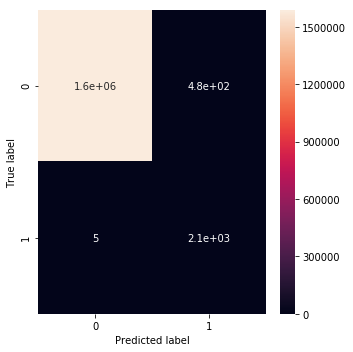

In [79]:
from sklearn.metrics import confusion_matrix

rf_cf = confusion_matrix(y_true=y_orig_test, y_pred=y_under_pred_rf)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rf_cf, ax=ax, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

In [80]:
feature = pd.Series(rf.feature_importances_,index=use_cols).sort_values(ascending=False)

In [81]:
feature

error_balanceOrig    0.386805
amount               0.170971
oldbalanceDest       0.153836
newbalanceOrig       0.128224
oldbalanceOrg        0.080903
error_balanceDest    0.026567
step                 0.018228
newbalanceDest       0.017566
isFraud              0.015509
isFlaggedFraud       0.001391
dtype: float64

No handles with labels found to put in legend.


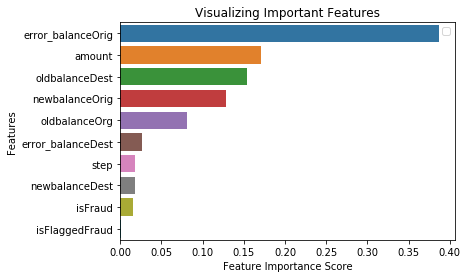

In [82]:
sns.barplot(x=feature, y=feature.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

看起來前面加的兩個 error balanced 的 feature 還是有一些效果的

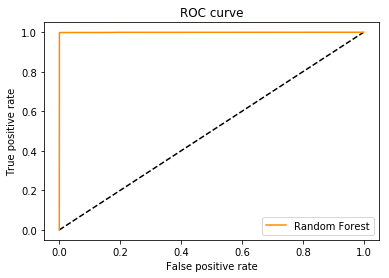

In [83]:
from sklearn.metrics import roc_curve
y_under_pred_rf_prob = rf.predict_proba(X_orig_test_std)[:, 1]
false_positive, true_positive, _ = roc_curve(y_orig_test, y_under_pred_rf_prob)



plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive, true_positive, color='darkorange', label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

#### 結果差不多

### over sampling

### SMOTE
1. 只考慮少數類樣本
2. 計算之間樣本間的歐式距離
3. 得到 K nearest neighbor
4. 依不平衡程度設置採樣倍率 n
5. 從 K nearest neighbor 隨機選 n 個樣本
6. 對於 n 個樣本用公式算出新的合成 data
7. 公式 : x_new = x_old + rand(0,1) x (x_n - x_old)

In [84]:

X_over = df.drop('isFraud', axis = 1)
y_over = df['isFraud']


In [85]:

type_encoding = {'CASH_IN' : 0, 'CASH_OUT' : 1, 'DEBIT' : 0, 'PAYMENT' : 0, 'TRANSFER' : 1} 
X_over["type"].replace(type_encoding, inplace = True)
X_over = X_over.drop(['nameOrig', 'nameDest'], axis=1)


In [86]:

from sklearn.model_selection import train_test_split

X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(X_over, y_over, test_size=0.25, random_state=123)


In [87]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_over_train)
X_over_train_std = sc.transform(X_over_train)
X_over_test_std = sc.transform(X_over_test)


/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [88]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state = 0)
smt_X, smt_y = smt.fit_sample(X_over_train_std, y_over_train.ravel())


In [89]:
print('After OverSampling, the shape of smt_X: {}'.format(smt_X.shape))
print('After OverSampling, the shape of smt_y: {} \n'.format(smt_y.shape))

print("After OverSampling, counts of label '1': {}".format(sum(smt_y==1)))
print("After OverSampling, counts of label '0': {}".format(sum(smt_y==0)))

After OverSampling, the shape of smt_X: (9531636, 10)
After OverSampling, the shape of smt_y: (9531636,) 

After OverSampling, counts of label '1': 4765818
After OverSampling, counts of label '0': 4765818


### LogisticRegression (over sample)

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_C = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
lr_over = LogisticRegression(random_state=0)
param_grid = [{'C': param_C}]
gs = GridSearchCV(estimator=lr_over, 
                  param_grid=param_grid, 
                  scoring='accuracy')
gs.fit(smt_X, smt_y)
print(gs.best_score_)
print(gs.best_params_)

/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futu

0.9688043059974174
{'C': 1000.0}


In [91]:
from sklearn.metrics import accuracy_score

lr_over = gs.best_estimator_
y_over_pred_lr = lr_over.predict(X_over_test_std)
print('Misclassified samples: %d' % (y_over_test != y_over_pred_lr).sum())
print('Accuracy: %.2f' % accuracy_score(y_over_test, y_over_pred_lr))

Misclassified samples: 89220
Accuracy: 0.94


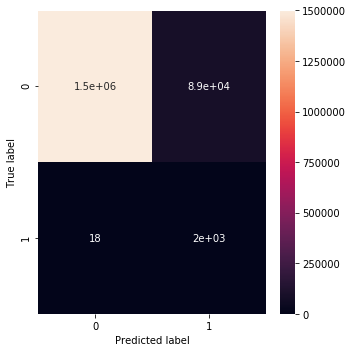

In [92]:
from sklearn.metrics import confusion_matrix

lr_over_cf = confusion_matrix(y_true=y_over_test, y_pred=y_over_pred_lr)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lr_over_cf, ax=ax, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

In [93]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_over_test, y_over_pred_lr))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1588589
           1       0.02      0.99      0.04      2066

   micro avg       0.94      0.94      0.94   1590655
   macro avg       0.51      0.97      0.51   1590655
weighted avg       1.00      0.94      0.97   1590655



#### Logistic Regression (over sample) 小結
* Accuracy : 0.94
* 在約 2100 筆詐欺中，**未偵測到 18 筆**
* 將 89202 筆非詐欺誤判為詐欺

### Random Forest (over sample)

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_over = RandomForestClassifier(random_state = 0, n_jobs=4, criterion = 'gini', max_depth = 15, n_estimators = 500)
rf_over.fit(smt_X, smt_y)
y_over_pred_rf = rf_over.predict(X_over_test_std)
print('Misclassified samples: %d' % (y_over_test != y_over_pred_rf).sum())
print('Accuracy: %.2f' % accuracy_score(y_over_test, y_over_pred_rf))

Misclassified samples: 66
Accuracy: 1.00


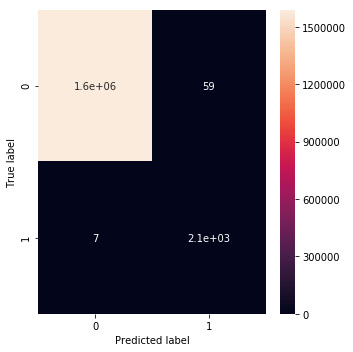

In [95]:
from sklearn.metrics import confusion_matrix

rf_over_cf = confusion_matrix(y_true=y_over_test, y_pred=y_over_pred_rf)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rf_over_cf, ax=ax, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

In [96]:
from sklearn.metrics import classification_report

print('Random Forest Classifier')
print(classification_report(y_over_test, y_over_pred_rf))

Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588589
           1       0.97      1.00      0.98      2066

   micro avg       1.00      1.00      1.00   1590655
   macro avg       0.99      1.00      0.99   1590655
weighted avg       1.00      1.00      1.00   1590655



#### Random Forest (over sample) 小結
* Accuracy : 1.00
* 在約 2100 筆詐欺中，**未偵測到 7 筆**
* 將 59 筆非詐欺誤判為詐欺

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#rf_over = RandomForestClassifier(random_state = 0, n_jobs=4, criterion = 'gini', max_depth = 15, n_estimators = 500)
#rf_over.fit(smt_X, smt_y)
feature_over = pd.Series(rf_over.feature_importances_,index=use_cols).sort_values(ascending=False)

In [98]:
feature_over

error_balanceOrig    0.395513
amount               0.183717
oldbalanceDest       0.152116
newbalanceOrig       0.129798
oldbalanceOrg        0.059626
step                 0.023711
error_balanceDest    0.023625
isFraud              0.018457
newbalanceDest       0.012181
isFlaggedFraud       0.001256
dtype: float64

No handles with labels found to put in legend.


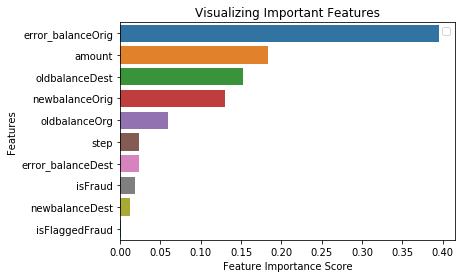

In [99]:
sns.barplot(x=feature_over, y=feature_over.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

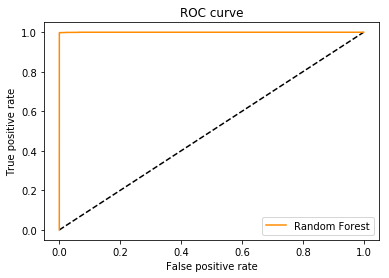

In [100]:
from sklearn.metrics import roc_curve
y_over_pred_rf_prob = rf_over.predict_proba(X_over_test_std)[:, 1]
false_positive, true_positive, _ = roc_curve(y_orig_test, y_over_pred_rf_prob)

plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive, true_positive, color='darkorange', label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### Deep Learning method 
#### model 1

In [101]:
# import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(units = 64, input_dim = 10, activation = 'relu'))
model.add(Dense(units = 32, input_dim = 64, activation = 'relu'))
model.add(Dense(units = 2, input_dim = 32, activation = 'softmax'))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 2,850
Trainable params: 2,850
Non-trainable params: 0
_________________________________________________________________


In [102]:
adam_opt = Adam(lr = 0.001)
model.compile(optimizer = adam_opt, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

#### (under sample)

In [103]:
history = model.fit(under_sample_X_train_std, under_sample_y_train, batch_size = 32, epochs = 20, validation_split = 0.2, verbose=2)

Train on 9835 samples, validate on 2459 samples
Epoch 1/20
 - 1s - loss: 0.2244 - acc: 0.9168 - val_loss: 0.1823 - val_acc: 0.9089
Epoch 2/20
 - 1s - loss: 0.1111 - acc: 0.9623 - val_loss: 0.1431 - val_acc: 0.9296
Epoch 3/20
 - 1s - loss: 0.0994 - acc: 0.9677 - val_loss: 0.1693 - val_acc: 0.9191
Epoch 4/20
 - 1s - loss: 0.0996 - acc: 0.9675 - val_loss: 0.2250 - val_acc: 0.9386
Epoch 5/20
 - 1s - loss: 0.0888 - acc: 0.9706 - val_loss: 0.1077 - val_acc: 0.9512
Epoch 6/20
 - 1s - loss: 0.0806 - acc: 0.9732 - val_loss: 0.1011 - val_acc: 0.9475
Epoch 7/20
 - 1s - loss: 0.0754 - acc: 0.9752 - val_loss: 0.1210 - val_acc: 0.9455
Epoch 8/20
 - 1s - loss: 0.0724 - acc: 0.9768 - val_loss: 0.1318 - val_acc: 0.9435
Epoch 9/20
 - 1s - loss: 0.0787 - acc: 0.9748 - val_loss: 0.1374 - val_acc: 0.9366
Epoch 10/20
 - 1s - loss: 0.0655 - acc: 0.9775 - val_loss: 0.0951 - val_acc: 0.9577
Epoch 11/20
 - 1s - loss: 0.0632 - acc: 0.9783 - val_loss: 0.0751 - val_acc: 0.9654
Epoch 12/20
 - 1s - loss: 0.0586 - ac

In [104]:
score = model.evaluate(X_orig_test_std, y_orig_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

1590655/1590655 [==============================] - 35s 22us/step
Test loss :  0.06396758421932539
Test accuracy :  0.9726540324583269


/Users/yangyating/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/legend.py:493: UserWarning: Unrecognized location "upper_left". Falling back on "best"; valid locations are
	upper center
	center left
	best
	right
	lower left
	center right
	upper left
	lower right
	center
	upper right
	lower center

  % (loc, '\n\t'.join(self.codes)))


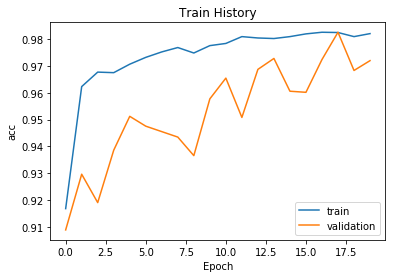

In [105]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train History')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper_left')
plt.show()


In [106]:
predictions_under = model.predict_classes(X_orig_test_std)

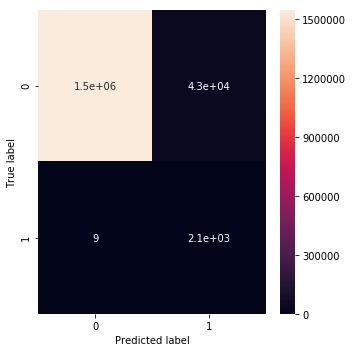

In [107]:
from sklearn.metrics import confusion_matrix

nn_under_cf = confusion_matrix(y_true=y_orig_test, y_pred=predictions_under)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nn_under_cf, ax=ax, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

#### (over sample)

In [108]:
history = model.fit(X_over_train_std, y_over_train, batch_size = 256, epochs = 20, validation_split = 0.2, verbose=2)

Train on 3817572 samples, validate on 954393 samples
Epoch 1/20
 - 31s - loss: 0.0056 - acc: 0.9991 - val_loss: 0.0022 - val_acc: 0.9994
Epoch 2/20
 - 29s - loss: 0.0023 - acc: 0.9994 - val_loss: 0.0022 - val_acc: 0.9994
Epoch 3/20
 - 29s - loss: 0.0021 - acc: 0.9995 - val_loss: 0.0020 - val_acc: 0.9995
Epoch 4/20
 - 30s - loss: 0.0020 - acc: 0.9995 - val_loss: 0.0021 - val_acc: 0.9995
Epoch 5/20
 - 29s - loss: 0.0020 - acc: 0.9995 - val_loss: 0.0019 - val_acc: 0.9995
Epoch 6/20
 - 29s - loss: 0.0019 - acc: 0.9995 - val_loss: 0.0017 - val_acc: 0.9996
Epoch 7/20
 - 28s - loss: 0.0019 - acc: 0.9995 - val_loss: 0.0018 - val_acc: 0.9995
Epoch 8/20
 - 30s - loss: 0.0019 - acc: 0.9996 - val_loss: 0.0022 - val_acc: 0.9995
Epoch 9/20
 - 29s - loss: 0.0018 - acc: 0.9995 - val_loss: 0.0017 - val_acc: 0.9996
Epoch 10/20
 - 28s - loss: 0.0018 - acc: 0.9996 - val_loss: 0.0017 - val_acc: 0.9996
Epoch 11/20
 - 29s - loss: 0.0017 - acc: 0.9996 - val_loss: 0.0020 - val_acc: 0.9995
Epoch 12/20
 - 29s - 

In [109]:
score = model.evaluate(X_over_test_std, y_over_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

1590655/1590655 [==============================] - 39s 25us/step
Test loss :  0.001519363259413938
Test accuracy :  0.999608337445895


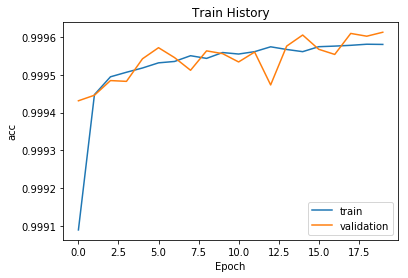

In [110]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train History')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper_left')
plt.show()

In [111]:
predictions_over = model.predict_classes(X_over_test_std)

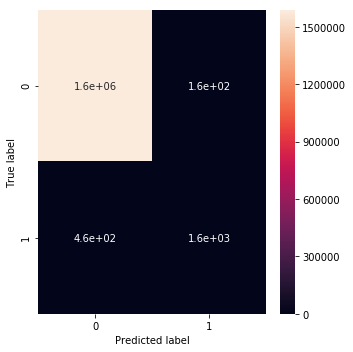

In [112]:
from sklearn.metrics import confusion_matrix

nn_over_cf = confusion_matrix(y_true=y_over_test, y_pred=predictions_over)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nn_over_cf, ax=ax, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

#### 這個 model 1 在 under sample 時將非詐欺判成詐欺的情況太多了 <-> 而在 over sample 時偵測詐欺的準確度又不夠

#### model 2

In [113]:
# import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(units = 10, input_dim = 10, activation = 'tanh'))
model.add(Dense(units = 32, input_dim = 10, activation = 'tanh'))
model.add(Dense(units = 64, input_dim = 32, activation = 'tanh'))
model.add(Dense(units = 64, input_dim = 64, activation = 'tanh'))
model.add(Dense(units = 16, input_dim = 64, activation = 'tanh'))
model.add(Dense(units = 2, input_dim = 16, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 34        
Total params: 7,808
Trainable params: 7,808
Non-trainable params: 0
_________________________________________________________________


In [114]:
adam_opt = Adam(lr = 0.001)
model.compile(optimizer = adam_opt, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

#### (under sample)

In [115]:
history = model.fit(under_sample_X_train_std, under_sample_y_train, batch_size = 32, epochs = 20, validation_split = 0.2, verbose=2)

Train on 9835 samples, validate on 2459 samples
Epoch 1/20
 - 1s - loss: 0.1501 - acc: 0.9419 - val_loss: 0.2017 - val_acc: 0.9000
Epoch 2/20
 - 1s - loss: 0.1088 - acc: 0.9605 - val_loss: 0.1187 - val_acc: 0.9349
Epoch 3/20
 - 1s - loss: 0.0925 - acc: 0.9666 - val_loss: 0.0918 - val_acc: 0.9508
Epoch 4/20
 - 1s - loss: 0.0861 - acc: 0.9707 - val_loss: 0.1199 - val_acc: 0.9402
Epoch 5/20
 - 1s - loss: 0.0777 - acc: 0.9720 - val_loss: 0.1233 - val_acc: 0.9508
Epoch 6/20
 - 1s - loss: 0.0741 - acc: 0.9741 - val_loss: 0.0958 - val_acc: 0.9520
Epoch 7/20
 - 1s - loss: 0.0734 - acc: 0.9748 - val_loss: 0.1081 - val_acc: 0.9508
Epoch 8/20
 - 1s - loss: 0.0696 - acc: 0.9766 - val_loss: 0.1021 - val_acc: 0.9557
Epoch 9/20
 - 1s - loss: 0.0672 - acc: 0.9780 - val_loss: 0.1132 - val_acc: 0.9601
Epoch 10/20
 - 1s - loss: 0.0663 - acc: 0.9771 - val_loss: 0.0922 - val_acc: 0.9581
Epoch 11/20
 - 1s - loss: 0.0653 - acc: 0.9781 - val_loss: 0.1198 - val_acc: 0.9496
Epoch 12/20
 - 1s - loss: 0.0592 - ac

In [116]:
predictions_under = model.predict_classes(X_orig_test_std)

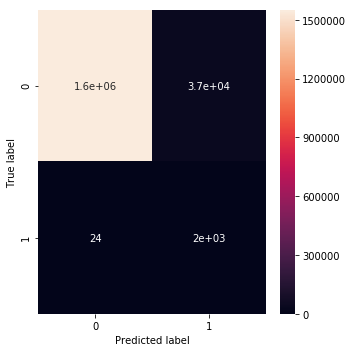

In [117]:
from sklearn.metrics import confusion_matrix

nn_under_cf = confusion_matrix(y_true=y_orig_test, y_pred=predictions_under)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nn_under_cf, ax=ax, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

#### (over sample)

In [118]:
history = model.fit(X_over_train_std, y_over_train, batch_size = 256, epochs = 20, validation_split = 0.2, verbose=2)

Train on 3817572 samples, validate on 954393 samples
Epoch 1/20
 - 38s - loss: 0.0058 - acc: 0.9986 - val_loss: 0.0027 - val_acc: 0.9993
Epoch 2/20
 - 37s - loss: 0.0026 - acc: 0.9994 - val_loss: 0.0023 - val_acc: 0.9994
Epoch 3/20
 - 37s - loss: 0.0024 - acc: 0.9994 - val_loss: 0.0021 - val_acc: 0.9995
Epoch 4/20
 - 38s - loss: 0.0023 - acc: 0.9994 - val_loss: 0.0022 - val_acc: 0.9994
Epoch 5/20
 - 37s - loss: 0.0023 - acc: 0.9995 - val_loss: 0.0021 - val_acc: 0.9995
Epoch 6/20
 - 38s - loss: 0.0022 - acc: 0.9995 - val_loss: 0.0020 - val_acc: 0.9995
Epoch 7/20
 - 38s - loss: 0.0022 - acc: 0.9995 - val_loss: 0.0019 - val_acc: 0.9995
Epoch 8/20
 - 39s - loss: 0.0021 - acc: 0.9995 - val_loss: 0.0020 - val_acc: 0.9995
Epoch 9/20
 - 38s - loss: 0.0021 - acc: 0.9995 - val_loss: 0.0020 - val_acc: 0.9995
Epoch 10/20
 - 38s - loss: 0.0021 - acc: 0.9995 - val_loss: 0.0018 - val_acc: 0.9996
Epoch 11/20
 - 37s - loss: 0.0020 - acc: 0.9995 - val_loss: 0.0021 - val_acc: 0.9994
Epoch 12/20
 - 38s - 

In [119]:
predictions_over = model.predict_classes(X_over_test_std)

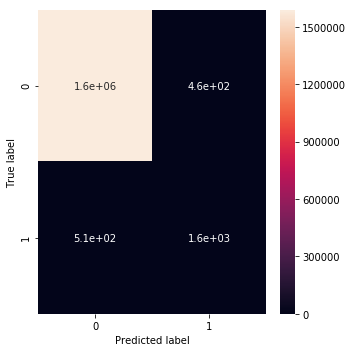

In [120]:
from sklearn.metrics import confusion_matrix

nn_over_cf = confusion_matrix(y_true=y_over_test, y_pred=predictions_over)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nn_over_cf, ax=ax, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

#### 這個 model 2 在 under sample 時將非詐欺判成詐欺的情況太多了 <-> 而在 over sample 時偵測詐欺的準確度又不夠

#### model 3 

In [121]:
# import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(units = 10, input_dim = 10, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 66        
Total params: 528
Trainable params: 528
Non-trainable params: 0
_________________________________________________________________


In [122]:
adam_opt = Adam(lr = 0.001)
model.compile(optimizer = adam_opt, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

#### (under sample)

In [123]:
history = model.fit(under_sample_X_train_std, under_sample_y_train, batch_size = 32, epochs = 20, validation_split = 0.2, verbose=2, shuffle=True,)

Train on 9835 samples, validate on 2459 samples
Epoch 1/20
 - 1s - loss: 0.4316 - acc: 0.8176 - val_loss: 0.3081 - val_acc: 0.8068
Epoch 2/20
 - 0s - loss: 0.1676 - acc: 0.9405 - val_loss: 0.2400 - val_acc: 0.8829
Epoch 3/20
 - 0s - loss: 0.1335 - acc: 0.9541 - val_loss: 0.2044 - val_acc: 0.9040
Epoch 4/20
 - 0s - loss: 0.1230 - acc: 0.9593 - val_loss: 0.1931 - val_acc: 0.9113
Epoch 5/20
 - 0s - loss: 0.1154 - acc: 0.9627 - val_loss: 0.1746 - val_acc: 0.9211
Epoch 6/20
 - 0s - loss: 0.1119 - acc: 0.9636 - val_loss: 0.1715 - val_acc: 0.9183
Epoch 7/20
 - 0s - loss: 0.1058 - acc: 0.9648 - val_loss: 0.1521 - val_acc: 0.9268
Epoch 8/20
 - 0s - loss: 0.1046 - acc: 0.9673 - val_loss: 0.1560 - val_acc: 0.9252
Epoch 9/20
 - 0s - loss: 0.0994 - acc: 0.9673 - val_loss: 0.1598 - val_acc: 0.9256
Epoch 10/20
 - 0s - loss: 0.0960 - acc: 0.9688 - val_loss: 0.1427 - val_acc: 0.9301
Epoch 11/20
 - 0s - loss: 0.0928 - acc: 0.9683 - val_loss: 0.1498 - val_acc: 0.9292
Epoch 12/20
 - 0s - loss: 0.0890 - ac

In [124]:
score = model.evaluate(X_orig_test_std, y_orig_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

1590655/1590655 [==============================] - 42s 27us/step
Test loss :  0.11433247516828525
Test accuracy :  0.9488330279035995


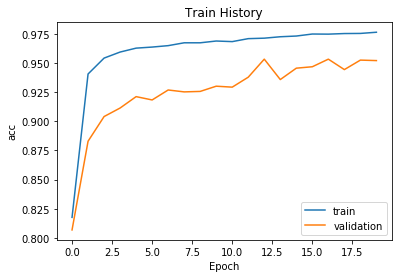

In [125]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train History')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper_left')
plt.show()


In [126]:
predictions_under = model.predict_classes(X_orig_test_std)

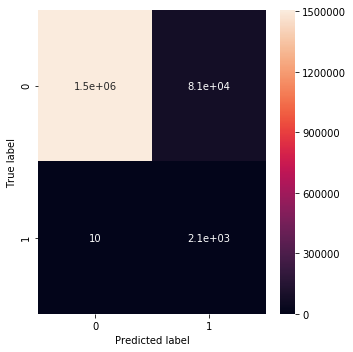

In [127]:
from sklearn.metrics import confusion_matrix

nn_under_cf = confusion_matrix(y_true=y_orig_test, y_pred=predictions_under)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nn_under_cf, ax=ax, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

#### 可以偵測出詐欺交易，且將非詐欺誤判為詐欺的情況也比前面兩個少

#### (over sample)

In [128]:
history = model.fit(X_over_train_std, y_over_train, batch_size = 256, epochs = 20, validation_split = 0.2, verbose=2, shuffle=True)

Train on 3817572 samples, validate on 954393 samples
Epoch 1/20
 - 28s - loss: 0.0072 - acc: 0.9988 - val_loss: 0.0028 - val_acc: 0.9994
Epoch 2/20
 - 29s - loss: 0.0024 - acc: 0.9994 - val_loss: 0.0023 - val_acc: 0.9994
Epoch 3/20
 - 28s - loss: 0.0023 - acc: 0.9994 - val_loss: 0.0022 - val_acc: 0.9995
Epoch 4/20
 - 28s - loss: 0.0022 - acc: 0.9995 - val_loss: 0.0021 - val_acc: 0.9995
Epoch 5/20
 - 29s - loss: 0.0021 - acc: 0.9995 - val_loss: 0.0021 - val_acc: 0.9995
Epoch 6/20
 - 28s - loss: 0.0021 - acc: 0.9995 - val_loss: 0.0020 - val_acc: 0.9995
Epoch 7/20
 - 28s - loss: 0.0020 - acc: 0.9995 - val_loss: 0.0023 - val_acc: 0.9995
Epoch 8/20
 - 29s - loss: 0.0020 - acc: 0.9995 - val_loss: 0.0019 - val_acc: 0.9995
Epoch 9/20
 - 29s - loss: 0.0019 - acc: 0.9995 - val_loss: 0.0020 - val_acc: 0.9995
Epoch 10/20
 - 28s - loss: 0.0019 - acc: 0.9995 - val_loss: 0.0019 - val_acc: 0.9995
Epoch 11/20
 - 28s - loss: 0.0019 - acc: 0.9995 - val_loss: 0.0018 - val_acc: 0.9995
Epoch 12/20
 - 29s - 

In [129]:
score = model.evaluate(X_over_test_std, y_over_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

1590655/1590655 [==============================] - 37s 23us/step
Test loss :  0.001505448508660852
Test accuracy :  0.9995813045569278


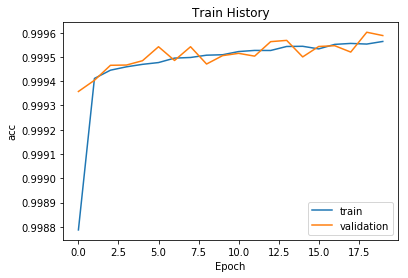

In [130]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train History')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper_left')
plt.show()

In [131]:
predictions_over = model.predict_classes(X_over_test_std)

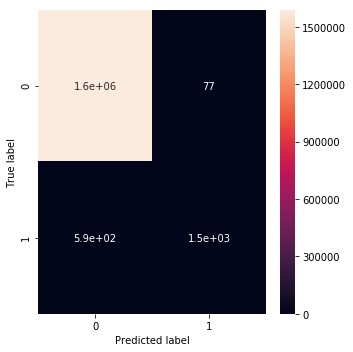

In [132]:
from sklearn.metrics import confusion_matrix

nn_over_cf = confusion_matrix(y_true=y_over_test, y_pred=predictions_over)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nn_over_cf, ax=ax, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

#### over sample 時雖然誤判程度比前兩個稍好，偵測詐欺的轉確度還是不高

## Result

### 這個 Task 用 SMOTE 做 oversample 之後用 Random Forest classifier 最好 
* Accuracy : 1.00 <br>
* 在約 2100 筆詐欺中，未偵測到 7 筆 <br>
* 將 59 筆非詐欺誤判為詐欺 

### 用 DL 的 model 做的話 under sample 跟 over sample 會有 trade off
* 偵測詐欺交易的能力 <-> 將非詐欺誤判詐欺的比例 <br>
* 若要偵測詐欺能力好 -> under sample <br>
* 若要非詐欺誤判詐欺的比例小 -> oversample <br>

## Discussion

### 1. Train-Test split 應該要在 under/over sample之前
* 這點真的蠻重要的，因為如果做了 under sample 或是 over sample 之後，才分 train-test 的話，test data 的型態分佈就會偏離真實世界中的樣子
* 就這個 project 來說，先 under sample 或是 over sample 之後才分 train-test，雖然效果看起來很好，可是現實中詐欺交易和正常交易的比例絕非 1 : 1，所以這樣做出來的 model 在現實中的可用性可能就不大
* 因此 Train-Test split 應該要在 under/over sample之前 才能讓 test 的 data 貼近現實

### 2. 可以不用 DL 解決的問題就不一定要用 DL 解決
* 這個 project 中，Random Forest 的結果就已經很好了，其實也不一定要用 DL 解決
* 畢竟 neural network 的參數並不好調，調參數可能會花掉很多時間，performance 也不一定會有顯著的提升
* 這裡我所簡單嘗試的 neural network 在 under sample 和 oversample 之間會存在 trade off
* under sample 本來就是遷就少數類的 imbalanced data 處理方式 -> 所以對少數類（詐欺）的偵測表現較好（感覺還算合理）
* oversample 則是遷就多數類的 imbalanced data 處理方式 -> 所以對多數類（非詐欺）的偵測表現較好（感覺也算合理）

### 3. 這個 task recall 一定要高， accuracy 跟 precision 呢
* 詐欺的 recall 是成功偵測出詐欺佔全部詐欺的比例，所以一定要高
* 但同時 accuracy 跟precision 也不能太低
* 舉現實生活中的例子：如果將非詐欺誤判成詐欺的狀況太多，銀行一認為是詐欺就終止交易的話，這樣對客戶會造成很大的困擾

這次的 final project 我花了不少時間在了解如何處理不平均的數據，對數據分析也有更進一步的了解。訓練之前先了解各個特徵真的是很重要的一件事，就算是我以為的一個小地方也都會對結果產生不小的影響。 除此之外，我想最大的收穫便是： test 的資料從原 data split 出來之後就不要動了，不然測試的結果可能不一定有可信度。最後，因為一直都對金融相關的知識和實作很有興趣，所以這次很幸運剛好在 kaggle 看到這個 dataset 並且很開心可以自己選擇 final 的題目。